<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/phan_loai_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import numpy as argmax
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
%cd '/content/drive/MyDrive/mon_an'

/content/drive/MyDrive/mon_an


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/mon_an/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 704 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/mon_an/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 195 images belonging to 10 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 70,validation_data=test_set,verbose = 1)

Epoch 1/70
22/22 [==============================] - 14s 635ms/step - loss: 0.8397 - accuracy: 0.7244 - val_loss: 0.6229 - val_accuracy: 0.8205
Epoch 2/70
22/22 [==============================] - 16s 730ms/step - loss: 0.8316 - accuracy: 0.7145 - val_loss: 0.6647 - val_accuracy: 0.8410
Epoch 3/70
22/22 [==============================] - 15s 681ms/step - loss: 0.8026 - accuracy: 0.7472 - val_loss: 0.6597 - val_accuracy: 0.8205
Epoch 4/70
22/22 [==============================] - 13s 609ms/step - loss: 0.7508 - accuracy: 0.7599 - val_loss: 0.5939 - val_accuracy: 0.8564
Epoch 5/70
22/22 [==============================] - 14s 635ms/step - loss: 0.7567 - accuracy: 0.7557 - val_loss: 0.6832 - val_accuracy: 0.8103
Epoch 6/70
22/22 [==============================] - 14s 627ms/step - loss: 0.7167 - accuracy: 0.7642 - val_loss: 0.6489 - val_accuracy: 0.8308
Epoch 7/70
22/22 [==============================] - 13s 622ms/step - loss: 0.7217 - accuracy: 0.7741 - val_loss: 0.4844 - val_accuracy: 0.8718

In [ ]:
training_set.class_indices

{'Banh_beo': 0,
 'Banh_hoi': 1,
 'Banh_it': 2,
 'Banh_mi': 3,
 'Bun_bo_Hue': 4,
 'Bun_thit_nuong': 5,
 'Chao_long': 6,
 'Com_tam': 7,
 'Ga_nuong': 8,
 'Oc': 9}

In [ ]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

1/1 [==============================] - 0s 204ms/step


array([3])

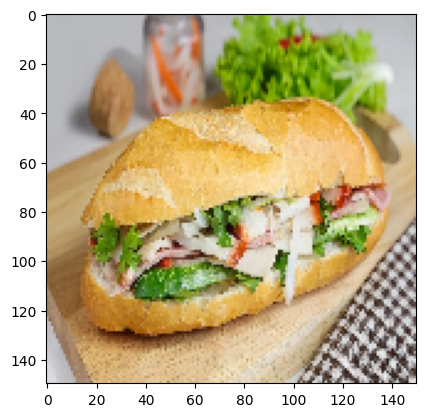

In [ ]:
img = load_img('/content/drive/MyDrive/mon_an/val/Banh_mi (1).jpeg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 97ms/step


array([4])

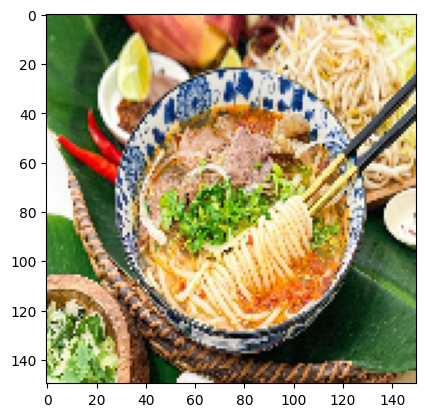

In [ ]:
img = load_img('/content/drive/MyDrive/mon_an/val/Bun_bo_Hue (6).jpeg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 37ms/step


array([5])

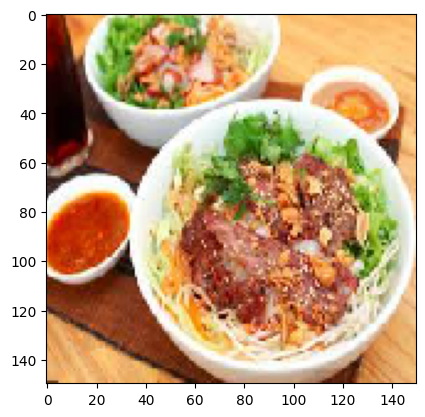

In [ ]:
img = load_img('/content/drive/MyDrive/mon_an/val/ (3).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)